In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
data_set=pd.read_csv('urine.csv')

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [21]:
from tensorflow.keras.optimizers import Adam

In [22]:
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X=data_set.iloc[:,[0,1,2,3,4,5]].values
y=data_set.iloc[:,[6]].values

In [24]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [25]:
X.shape

(79, 6)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape

(63, 6)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train = X_train.reshape(63,6,1)
X_test = X_test.reshape(16,6,1)

In [53]:
#The NN Model
epochs = 150

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape = (6,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape = (6,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 5, 32)             96        
_________________________________________________________________
batch_normalization_12 (Batc (None, 5, 32)             128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 32)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4, 64)             4160      
_________________________________________________________________
batch_normalization_13 (Batc (None, 4, 64)             256       
_________________________________________________________________
dropout_19 (Dropout)         (None, 4, 64)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)              

In [54]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test), verbose =1)

Train on 63 samples, validate on 16 samples
Epoch 1/150
63/63 [==============================] - 4s 66ms/sample - loss: 1.2891 - accuracy: 0.5079 - val_loss: 2.9083 - val_accuracy: 0.4375
Epoch 2/150
63/63 [==============================] - 0s 1ms/sample - loss: 1.1697 - accuracy: 0.5079 - val_loss: 2.0145 - val_accuracy: 0.4375
Epoch 3/150
63/63 [==============================] - 0s 1ms/sample - loss: 1.2555 - accuracy: 0.4921 - val_loss: 1.6245 - val_accuracy: 0.4375
Epoch 4/150
63/63 [==============================] - 0s 857us/sample - loss: 1.1873 - accuracy: 0.4444 - val_loss: 1.3953 - val_accuracy: 0.4375
Epoch 5/150
63/63 [==============================] - 0s 1ms/sample - loss: 1.4173 - accuracy: 0.4286 - val_loss: 1.2418 - val_accuracy: 0.4375
Epoch 6/150
63/63 [==============================] - 0s 984us/sample - loss: 1.0455 - accuracy: 0.5714 - val_loss: 1.1282 - val_accuracy: 0.4375
Epoch 7/150
63/63 [==============================] - 0s 1ms/sample - loss: 1.1453 - accuracy:

In [55]:
#Learning Curve
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc = 'upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc = 'upper left')
  plt.show()

In [56]:
history.history

{'loss': [1.289061080841791,
  1.1697132019769578,
  1.255470525650751,
  1.187257725094992,
  1.4172643044638256,
  1.045518490057143,
  1.145322150654263,
  0.9948021381620377,
  1.1783129260653542,
  1.0895527563397847,
  1.1677336087302557,
  0.8436059999087501,
  1.04009923670027,
  1.0936040575542147,
  0.7920528555673266,
  0.7831304811296009,
  0.9419641948881603,
  0.9502273977748932,
  1.0843680406373644,
  1.0778058417259702,
  0.8536862617447263,
  1.0765052390477015,
  0.9681066984222049,
  0.9034853946594965,
  0.9363446964157952,
  0.8305810037113371,
  0.9504807411678253,
  1.0650611775262016,
  0.9778015660861182,
  0.9139765236112807,
  0.81775268675789,
  0.7895327976771763,
  0.9131194230109926,
  0.7892762356334262,
  0.8539125484133524,
  1.0716443686258226,
  0.8602778296622019,
  0.8924256714563521,
  0.853733756239452,
  0.8706360090346563,
  0.7465481587818691,
  0.9063821520124163,
  0.709080285496182,
  0.9156650323716421,
  0.8722561796506246,
  0.705809943

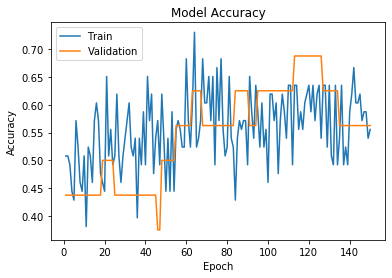

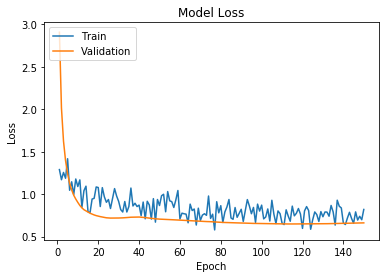

In [57]:
plot_learningCurve(history, epochs)